In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
input_folder = '/content/drive/MyDrive/Trimmed_AID'

In [ ]:
import splitfolders as sf
sf.ratio(input_folder,output = '/content/drive/MyDrive/Trimmed_AID_dataset',seed=42,ratio=(.7,.2,.1),group_prefix=None)

In [12]:
# Define dataset directories
train_path = 'Trimmed_AID_dataset/train'
val_path = 'Trimmed_AID_dataset/val'

In [13]:
# Analyze dataset structure for class distribution
classes = os.listdir(train_path)
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}
print("Class counts:", class_counts)

Class counts: {'Airport': 40, 'BareLand': 40, 'BaseballField': 40, 'Beach': 40, 'Bridge': 40, 'Center': 40, 'Church': 40, 'Commercial': 40, 'DenseResidential': 40, 'Desert': 40, 'Farmland': 40, 'Forest': 40, 'Industrial': 40, 'Meadow': 40, 'MediumResidential': 40, 'Mountain': 40, 'Park': 40, 'Parking': 40, 'Playground': 40, 'Pond': 40, 'Port': 77, 'RailwayStation': 40, 'Resort': 40, 'River': 42, 'School': 40, 'SparseResidential': 74, 'Square': 76, 'Stadium': 40, 'StorageTanks': 77, 'Viaduct': 40}


In [14]:
# Handle class imbalance by calculating class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(list(class_counts.keys())),
    y=np.concatenate([[cls] * count for cls, count in class_counts.items()])
)
class_weights = {i: weight for i, weight in enumerate(class_weights)}
print("Computed class weights:", class_weights)

Computed class weights: {0: 1.1216666666666666, 1: 1.1216666666666666, 2: 1.1216666666666666, 3: 1.1216666666666666, 4: 1.1216666666666666, 5: 1.1216666666666666, 6: 1.1216666666666666, 7: 1.1216666666666666, 8: 1.1216666666666666, 9: 1.1216666666666666, 10: 1.1216666666666666, 11: 1.1216666666666666, 12: 1.1216666666666666, 13: 1.1216666666666666, 14: 1.1216666666666666, 15: 1.1216666666666666, 16: 1.1216666666666666, 17: 1.1216666666666666, 18: 1.1216666666666666, 19: 1.1216666666666666, 20: 0.5826839826839827, 21: 1.1216666666666666, 22: 1.1216666666666666, 23: 1.0682539682539682, 24: 1.1216666666666666, 25: 0.6063063063063063, 26: 0.5903508771929824, 27: 1.1216666666666666, 28: 0.5826839826839827, 29: 1.1216666666666666}


In [15]:
# 1. Inspect dataset
def inspect_images(dataset_dir):
    image_shapes = []
    for cls in os.listdir(dataset_dir):
        cls_folder = os.path.join(dataset_dir, cls)
        for img_file in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img_file)
            with Image.open(img_path) as img:
                image_shapes.append(img.size)
    return image_shapes

image_shapes = inspect_images(train_path)
image_widths, image_heights = zip(*image_shapes)
print(f"Image Widths: min={min(image_widths)}, max={max(image_widths)}")
print(f"Image Heights: min={min(image_heights)}, max={max(image_heights)}")

Image Widths: min=600, max=600
Image Heights: min=600, max=600


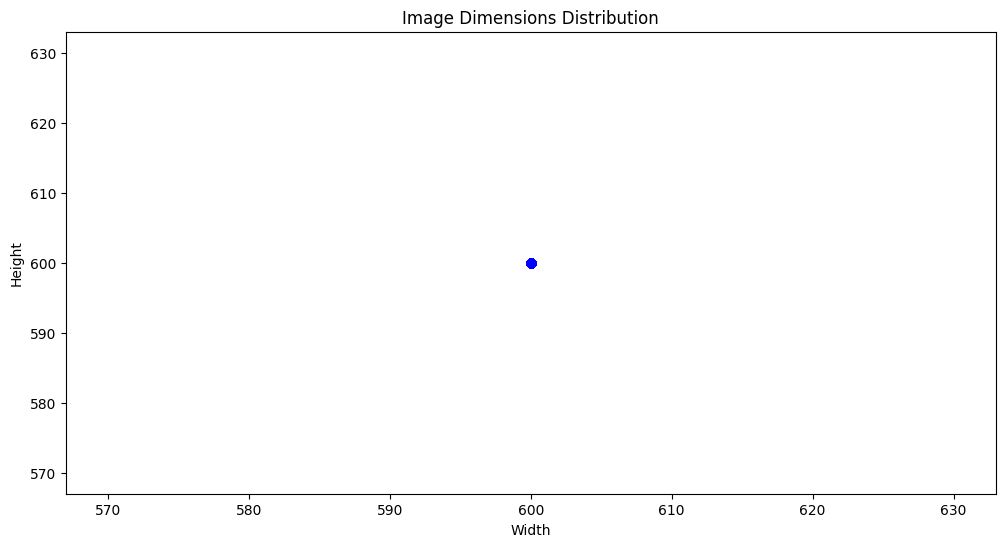

In [16]:
# Visualize image sizes
plt.figure(figsize=(12, 6))
plt.scatter(image_widths, image_heights, alpha=0.5, c='blue')
plt.title('Image Dimensions Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [5]:

# Define image data generators for train and validation sets with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create data generators for train and validation sets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1346 images belonging to 30 classes.
Found 672 images belonging to 30 classes.


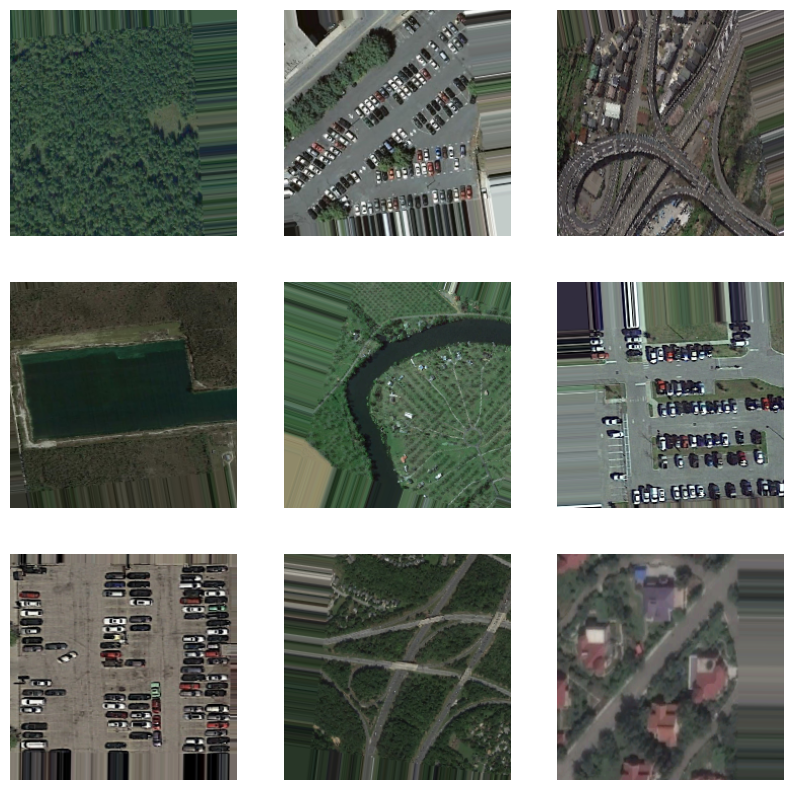

In [ ]:
import matplotlib.pyplot as plt

def visualize_augmentations(generator):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 augmented images
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

visualize_augmentations(train_generator)